Working File for Group Project in Machine Learning

# Introduction

With the increase of the world population and the increased need for food that this generates, the development of intensive cultures is always more important, the prediction of yields has become a financial and social necessary. However, with the development of more environmentally friendly practices and in particular the decrease in the use of pesticides, crop yields are often modified downwards. Extreme weather events such as droughts or late frosts also lead to a decrease in agricultural yields. The prediction of these yields is hard due to the high amount of uncertainty, such as droughts, pests and more.
In our project we implemented different machine learning algorithms to tackle the difficulties of prediction.
Such prediction could enable better management of agricultural land, and could also be an interesting tool for estimating prices, hunger, etc.

# Data

For this project we used a dataset from the FAO and the World Data Bank, containing the following information: country, year, yield, crops, rainfall, temperature and pesticides. The first step is to gather the data in one dataframe, being able to apply operations on all the data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1')
df2 = df
df2 = df2[df2["Area Code"]<1000] # removing the summarized Areas (Africa as a hole etc.)
df2 = df2.drop(["Area Code", "Area Code (M49)","Item Code (CPC)" ,"Item Code", "Element Code", "Element"], axis=1) # removing not used columns
df2 = df2.drop(df2.columns[df2.columns.str.endswith('F')], axis=1) # removing all columns which say how the data was collected. To reduce dataset complexity.
df2 = pd.melt(df2, id_vars=['Area', "Item",  "Unit"], var_name='Year', value_name='Value') # reshaping the df to create a single year column
df2['Year'] = df2['Year'].str[1:] # removing the letter of before the years
df2['Year'] = df2['Year'].astype(int)
df2 = df2.rename(index=str, columns={"Value": "yield_amound"})

df2.head(10)

,Area,Item,Unit,Year,yield_amound
0,Afghanistan,"Almonds, in shell",ha,1961,NaN
1,Afghanistan,"Almonds, in shell",hg/ha,1961,NaN
2,Afghanistan,"Almonds, in shell",tonnes,1961,NaN
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",ha,1961,NaN
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",hg/ha,1961,NaN
5,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",tonnes,1961,NaN
6,Afghanistan,Apples,ha,1961,2220.0
7,Afghanistan,Apples,hg/ha,1961,68018.0
8,Afghanistan,Apples,tonnes,1961,15100.0
9,Afghanistan,Apricots,ha,1961,4820.0


In [ ]:
df2.tail(10)

,Area,Item,Unit,Year,yield_amound
3737704,Zimbabwe,"Skim Milk & Buttermilk, Dry",tonnes,2021,NaN
3737705,Zimbabwe,Sugar Crops Primary,ha,2021,47000.00
3737706,Zimbabwe,Sugar Crops Primary,hg/ha,2021,734043.00
3737707,Zimbabwe,Sugar Crops Primary,tonnes,2021,3450000.00
3737708,Zimbabwe,"Treenuts, Total",ha,2021,3261.00
3737709,Zimbabwe,"Treenuts, Total",hg/ha,2021,21544.00
3737710,Zimbabwe,"Treenuts, Total",tonnes,2021,7025.62
3737711,Zimbabwe,Vegetables Primary,ha,2021,35148.00
3737712,Zimbabwe,Vegetables Primary,hg/ha,2021,66770.00
3737713,Zimbabwe,Vegetables Primary,tonnes,2021,234679.67


The first dataset contains information of the agricultural production per country and year. We keep only columns which have relevant information for us. For later it is relevant that there are a lot of different Products, and that the production is quantified in different Units. The dataset ranges form 1961-2021.

In [ ]:
dg = pd.read_csv("data/rain.csv", encoding='latin-1')
dg2=dg.drop(['Stop','Indicator','Code','IndicatorCode'], axis=1)
dg2 = pd.melt(dg2, id_vars=['ï»¿Area'], var_name='Year', value_name='Value') # reshaping the df to create a single year column
dg2=dg2.dropna()
dg2 = dg2.rename(index=str, columns={"Value": "rain"})
dg2 = dg2.rename(index=str, columns={"ï»¿Area": "Area"})
dg2['Year']=dg2['Year'].astype('int')


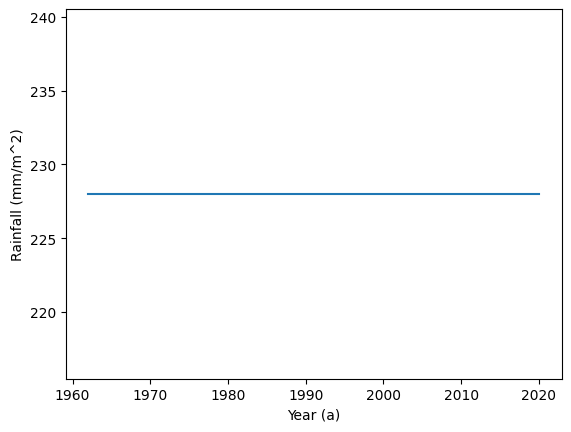

In [ ]:
a = dg2[dg2["Area"] == "Iran"]
fig = sns.lineplot(data=a, x="Year", y="rain", markers=True)
plt.xlabel("Year (a)")
plt.ylabel("Rainfall (mm/m^2)")
plt.show(fig)

The second dataset is describing the average rainfall per square meter. Here only the relevant columns were kept. But the dataset has the problem that it has only limited meaningfulness, due to the fact that much of the values were estimated and have the same value for most of the years, as seen above.

In [ ]:
dr = pd.read_csv("data/FAOSTAT_data_en_4-18-2023.csv", encoding='latin-1')
dr2 = dr
dr2 = dr2[dr2["Item"] == "Pesticides (total)"] #just using "Pesticides (total)" to reduce complexity
dr2 = dr2[dr2["Unit"] == "tonnes"] # just using "tonnes" to reduce complexity
dr2 = dr2.drop(["ï»¿Domain Code", "Area Code (M49)", "Item Code", "Element Code", "Year Code", "Flag", "Flag Description","Element", "Domain", "Item"], axis=1) # removing not used columns
dr2 = dr2.rename(index=str, columns={"Value": "pesticide_amound"})
dr2

,Area,Year,Unit,pesticide_amound
0,Albania,1990,tonnes,121.00
1,Albania,1991,tonnes,121.00
2,Albania,1992,tonnes,121.00
3,Albania,1993,tonnes,121.00
4,Albania,1994,tonnes,201.00
...,...,...,...,...
65752,Zimbabwe,2016,tonnes,2185.07
65753,Zimbabwe,2017,tonnes,2185.07
65754,Zimbabwe,2018,tonnes,2185.07
65755,Zimbabwe,2019,tonnes,2185.07


In the third dataset we got information of the Pesticide use per country and year. The dataset was cleaned to only keep relevant columns. Relevant here is the timespann which only goes from 1990 till 2020, this timespan is very much smaller that the information we have from other datasets. The includes total pesticide plus a separation into different pesticides, such as herbicides etc.. To reduce the complexity of the problem we use the total pesticide amounts.

In [ ]:
di = pd.read_csv("data/temp.csv", encoding='latin-1')
di2 = di.rename(index=str, columns={"year": "Year"}) # renaming columns
di2 = di2.rename(index=str, columns={"country": "Area"}) #renaming columns
di2 = di2.drop_duplicates(subset=['Area', "Year"], keep='last')
di2["Area"]=di2["Area"].replace(["United States", "Russia", "Bolivia"],["United States of America", "Russian Federation", "Bolivia (Plurinational State of)"]) #changing country names.
di2

,Year,Area,avg_temp
165,1843,United Arab Emirates,26.04
166,1844,United Arab Emirates,26.26
167,1845,United Arab Emirates,NaN
168,1846,United Arab Emirates,NaN
169,1847,United Arab Emirates,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


The 4th dataset includes information about the average temperature per country. In this dataset country's had different names, so this problem had to be fixed. The timeframe is huge in the dataset. But no relevant to us, because no of our other datasets, have such a long range.

In [ ]:
merged = pd.merge(df2, dr2, on= ["Area", "Year"], how= "outer" )
merged = pd.merge(di2, merged, on= ["Area", "Year"], how= "outer")
merged = pd.merge(dg2, merged, on= ["Area", "Year"], how= "outer")

In [ ]:
merged.dtypes

Area                 object
Year                  int64
rain                float64
avg_temp            float64
Item                 object
Unit_x               object
yield_amound        float64
Unit_y               object
pesticide_amound    float64
dtype: object

The datasets are merged on year and area using the outer fit. This secures that we are not loosing important Information, but this also means that the resulting dataset is huge. In the final dataset we have a variety of columns, which are described in the following . "Area" is a object column with the country's. "Year" is an integer column with time information with the resolution of years. "rain" is a continuos column with average rainfall in mm/ m^2. "avg_temp" is a continuous column which describes the average temperature. "Item" has information about the kind of agricultural product stored in a object column. "yield_amound" stores the amount of yield in a continues column with the unit described in "Unit_x", which is a object colum with units such as "ha" or "tonnes". The column "pesticide_amound" contains the values of total pesticide amounts with the Unit "tonnes", described in "Unit_y".

In [ ]:
def get_na_distribution(dataframe):
    total_na = dataframe.isna().sum()
    percentage_na = (total_na / len(dataframe)) * 100
    na_distribution = pd.concat([total_na, percentage_na], axis=1, keys=['Total NA', 'Percentage NA'])
    na_distribution = na_distribution[na_distribution['Total NA'] > 0]
    na_distribution.sort_values(by='Total NA', ascending=False, inplace=True)
    return na_distribution

get_na_distribution(merged)

,Total NA,Percentage NA
Unit_y,2198556,58.238475
pesticide_amound,2198556,58.238475
avg_temp,1689138,44.744287
rain,1132787,30.006871
yield_amound,975983,25.853224
Item,23041,0.610343
Unit_x,23041,0.610343


A big Problem of the data set are the missing values. Especially the columns containing the information about the Pesticides hav a lot of missing values. This is caused mainly from the short timeframe. But the temperature data has also much missing data. (here more information why).

In General the most machine learning models work badly with missing data. To clean the dataset, either (here answer to NAs).

In [ ]:
merged.describe()

,Year,rain,avg_temp,yield_amound,pesticide_amound
count,3.775092e+06,2.642305e+06,2.085954e+06,2.799109e+06,1.576536e+06
mean,1.990353e+03,1.142553e+03,1.719064e+01,8.248359e+05,2.198202e+04
std,1.998773e+01,7.916616e+02,7.622080e+00,9.434097e+06,6.205351e+04
min,1.743000e+03,1.810000e+01,-1.213000e+01,0.000000e+00,3.000000e-02
25%,1.975000e+03,5.890000e+02,1.011000e+01,1.670000e+03,3.139000e+02
50%,1.991000e+03,9.000000e+02,1.744000e+01,1.530500e+04,2.485120e+03
75%,2.006000e+03,1.651000e+03,2.480000e+01,1.036820e+05,1.187192e+04
max,2.021000e+03,3.240000e+03,3.073000e+01,7.685942e+08,4.345408e+05


In [ ]:
2.642305e+06

2642305.0

When examining the distibution of the dataframe, it becomes clear, that some of the datacolumns are not normalised. There is a huge difference in size. While the mean of the rain data is at

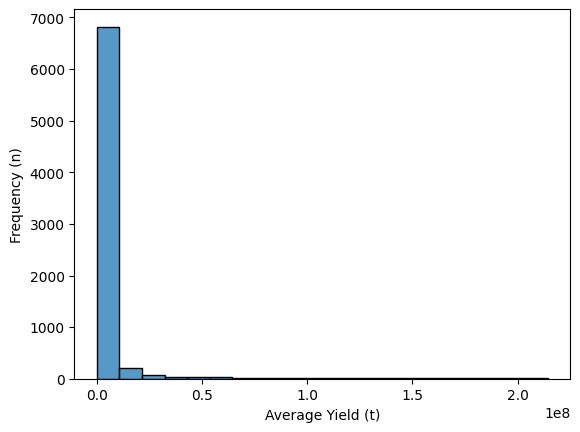

In [ ]:
a = merged[merged["Unit_x"] == "tonnes"]
a = a[a["Item"] == "Rice"]
fig = sns.histplot(data = a, x= "yield_amound", bins = 20)
plt.xlabel("Average Yield (t)")
plt.ylabel("Frequency (n)")
plt.show(fig)

Espectially the yield amound has a huge variety. As shown exemplary for Rice in the graph above, the distribution is cleary more around the right side. The standart diviation is at 9.434097e+06 while the mean is only at 8.248359e+05. Depending on the algorythm used, it will be nessecary to standardise the data.

In [ ]:
# Specify the file path and name for the CSV file
csv_file_path = 'data/file.csv'

# Use the 'to_csv' function to save the dataframe as a CSV file
merged.to_csv(csv_file_path, index=False)

To avoid having the need to load and merge the dataset every time, we are writing the merged dataset in a seperate CSV file, wich is then stored in the data folder and will be loaded afterwards.

In [8]:
data = pd.read_csv("data/file.csv", encoding='latin-1')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_14608\1933639226.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/file.csv", encoding='latin-1')


# Methods

We have the problem that our dataset is very big and not homogeneous. Our computing power is not enough to work with the entire dataset. To workaround this problem we used parts of the data to build problem specific models. Starting with the model with the smallest dataset.

SARIMAX prediction

In [9]:
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

A popular approach to timeseries data is the use of SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors). Its an extension for the ARIMA model that incorporates both seconal and exogenous variables.

In [10]:
datas = data[data["Area"] == "Brazil"]
datas = datas[datas["Item"] == "Rice"]
datas = datas[datas["Unit_x"] == "hg/ha"]
datas = datas[["Year", "yield_amound"]]
datas["Year"] = datas["Year"].astype("float")
datas = datas.drop_duplicates(subset=['yield_amound', 'Year'], keep='last')

The model can only be used on single variable predictions. Here Brazils production of Cereals was chosen.

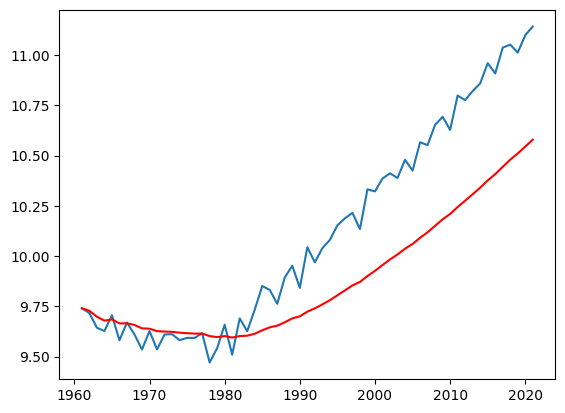

In [11]:
datas["Year"] = datas["Year"].astype("int")
dataa = datas.groupby('Year')['yield_amound'].sum().reset_index()
dataa = dataa.set_index('Year')
dataa.index = pd.to_datetime(dataa.index, format='%Y').strftime('%Y/%m/%d')
#create new DataFrame:
dataa.index = pd.to_datetime(dataa.index)
#pd.to_datetime(df['Year'], format='%Y')

y = dataa['yield_amound'].resample("YS").mean()
ts_log = np.log(y)
moving_avg = ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

The first step is to check that the data is mostly stationary, to have an idea of the sesonal effects. The stationary data is stored here in "ts_log".

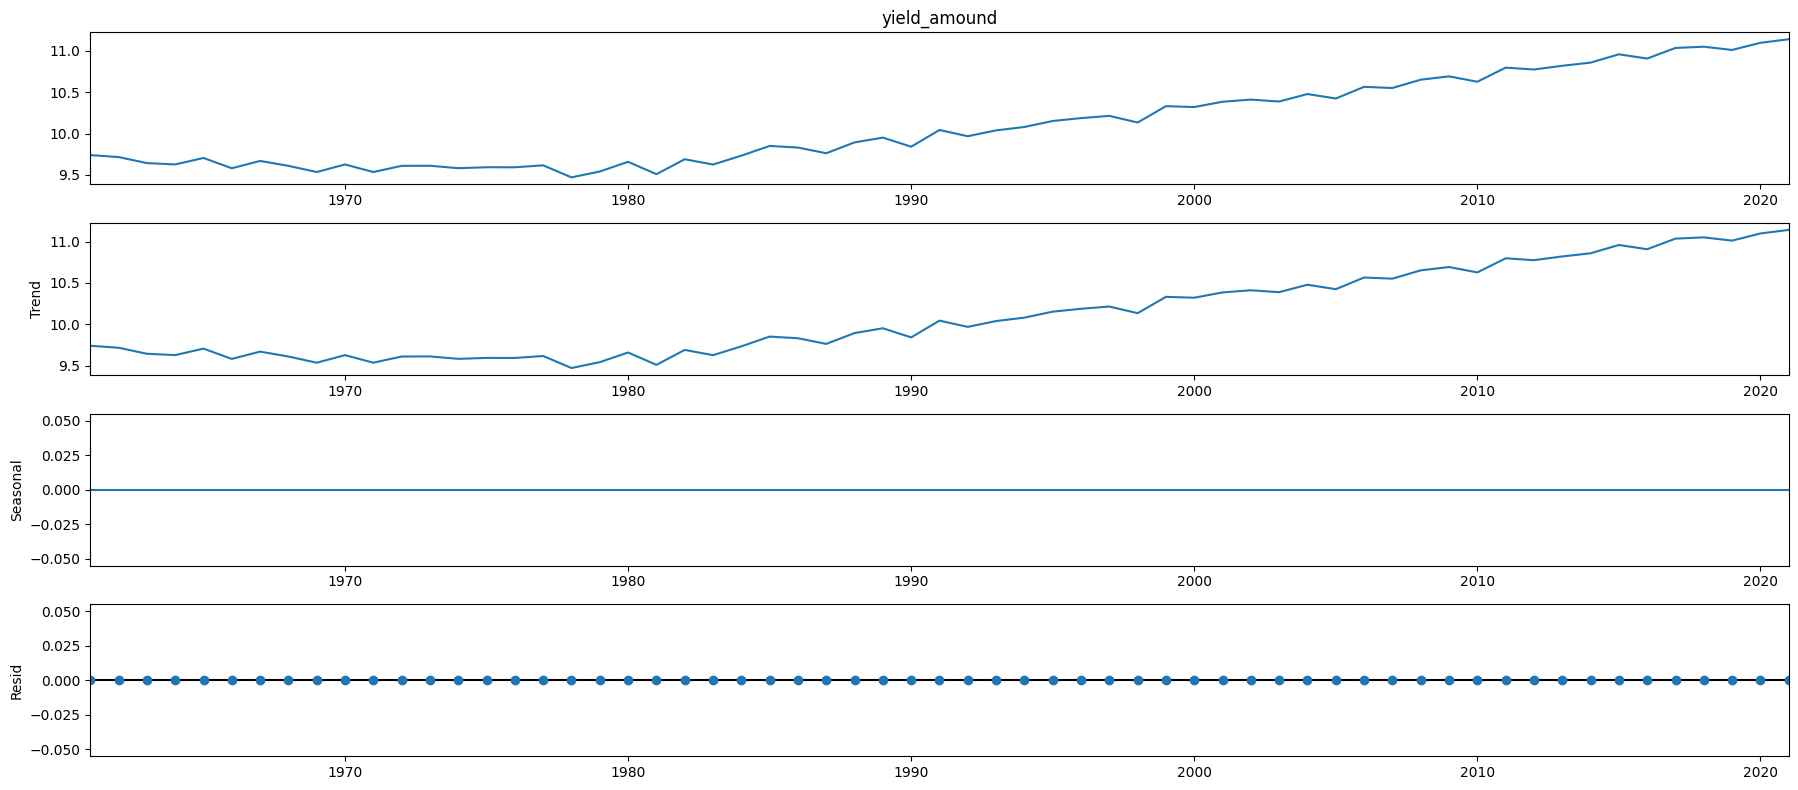

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive', extrapolate_trend='freq')
fig = decomposition.plot()
plt.show()

But when checkted for sesonality, no can be detected. Only a trend, with increasing values.

In [13]:
year = 2000

rownumb = len(datas[datas["Year"] <= year])
train = y[:rownumb]
test = y[rownumb:]

The dataset is split into training and testing data.

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,5,5))

results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Year'>

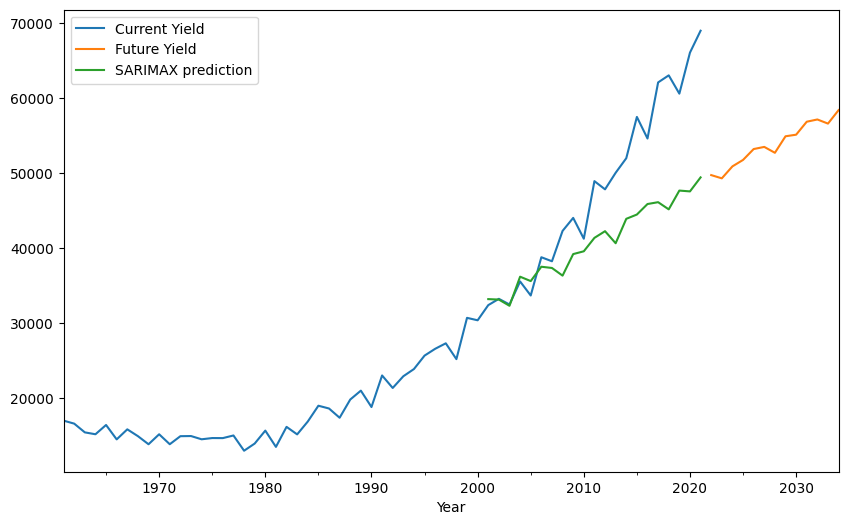

In [ ]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
future_yield= results.predict(start= len(y), end=(len(y)+12))
y.plot(legend=True, label='Current Yield', figsize=(10,6))

future_yield.plot(legend= True, label='Future Yield')
pre.plot(legend=True, label='SARIMAX prediction')

Although no seasonal trend was seen in the data, the model was able to make a prediction. TO get a more general model which is capable to predict the production for a variety of countries, then other approaches were tested.

 ## Whole dataset

In [14]:
datas = data[data["Unit_x"] == "hg/ha"]
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item", axis= 1)
#datas = datas.drop("pesticide_amound", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])
datas

,Area,Year,rain,avg_temp,yield_amound,pesticide_amound
160,Afghanistan,1961,327.0,14.23,15190.0,NaN
381,Angola,1961,1010.0,23.75,11600.0,NaN
717,Albania,1961,1485.0,16.19,15514.0,NaN
1518,Australia,1961,534.0,16.86,59000.0,NaN
2175,Burundi,1961,1274.0,20.90,37641.0,NaN
...,...,...,...,...,...,...
3773290,Venezuela (Bolivarian Republic of),2021,NaN,NaN,41999.0,NaN
3773604,Viet Nam,2021,NaN,NaN,60740.0,NaN
3774243,Yugoslav SFR,2021,NaN,NaN,NaN,NaN
3774523,Zambia,2021,NaN,NaN,14893.0,NaN


First the data is collected. The used target variable is the yield in hg per ha.

In [15]:
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)
yield_df_onehot = yield_df_onehot.dropna()
yield_df_onehot

,Year,rain,avg_temp,yield_amound,pesticide_amound,Area_Afghanistan,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,...,Area_Ukraine,Area_United Republic of Tanzania,Area_United States of America,Area_Uruguay,Area_Uzbekistan,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
1199780,1990,1010.0,24.12,9512.0,64.00,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1200116,1990,1485.0,16.37,23333.0,121.00,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1200710,1990,591.0,17.67,36709.0,26156.00,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1201324,1990,534.0,17.47,88000.0,17866.42,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1201981,1990,1274.0,21.15,33333.0,92.08,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344792,2013,565.0,10.33,59938.0,86781.80,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2345106,2013,1300.0,15.92,78812.0,19028.60,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2346446,2013,495.0,14.98,26087.0,26857.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2346721,2013,1020.0,20.14,11617.0,3837.73,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In order to being able to work with the object coloum, we encode the Area colum with the "get_dummies" function. Because the models cant work with missing data the missing data is removed.

### detailed walkthough the model code

The main way we apply models is by using the sklearn libary.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

First we load the used libarys.

In [17]:
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
scaler = StandardScaler()
X = scaler.fit_transform(X)

Then the features (X) and the target variable (y) are defined. And X is scaled.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The data is then split into training and test data with a test size of 0.2.

In [19]:
model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In model training the model is choosen, here linear regression. Then it is fit/trained on the training data.

In [20]:
y_pred_linear = model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
print('Mean Squared Error:', mse_linear)

Mean Squared Error: 51423056.451222934


The Mean Squared Error (mse) on it seld has no real meaning, only in comparison with other mse from other models, a decision is possible.

<Axes: xlabel='yield_amound'>

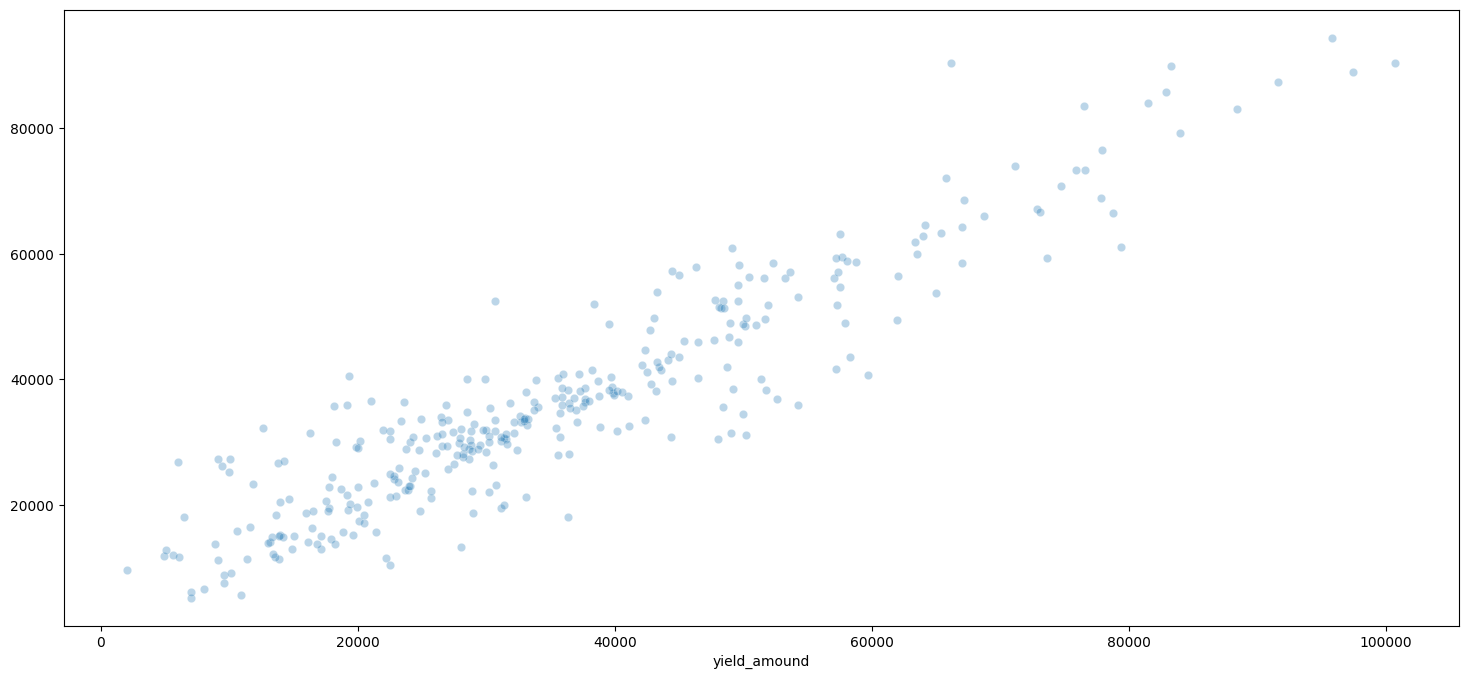

In [21]:
sns.scatterplot(x=y_test, y=y_pred_linear, alpha= 0.3)

A nice way of showing the model accuracy in ploting the predicted vs the actual values. A perfect fit would be a line in the middle.

In model validation a number of solutions is used to get compareble results. First the model is used to predict y on the test data. Then the mean square error is calculated, based on the predicted values and the predicted values.

In the following code, using the sameframework, multible different models are tested and afterward compared.

In [23]:
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_gradienboost = mean_squared_error(y_test, y_pred)

# Random Forrest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_random_forrest = model.predict(X_test)
mse_random_forrest = mean_squared_error(y_test, y_pred_random_forrest)


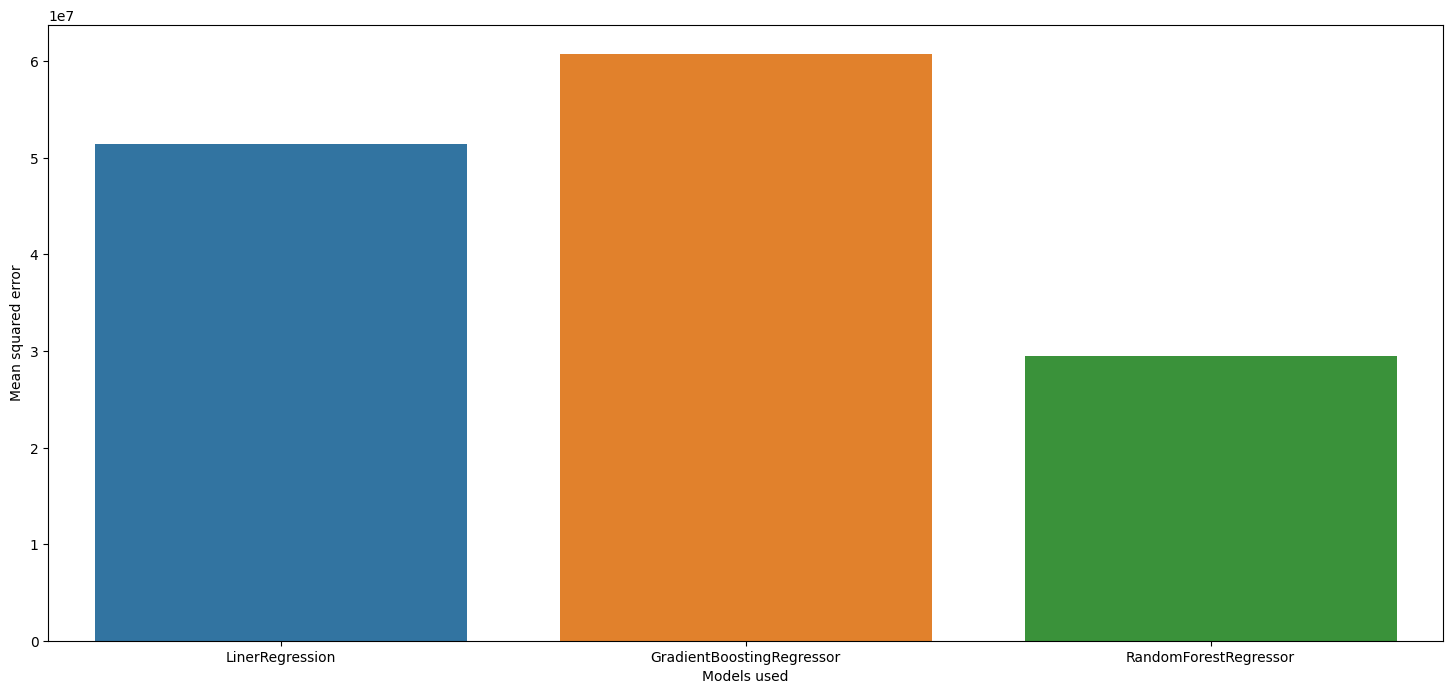

In [24]:
di = pd.DataFrame({"model_type": ["LinerRegression", "GradientBoostingRegressor", "RandomForestRegressor"], "MSE": [mse_linear,mse_gradienboost, mse_random_forrest]})
fig = sns.barplot(data = di, y= "MSE",x="model_type")
plt.xlabel("Models used")
plt.ylabel("Mean squared error")
plt.show(fig)

### comparing feature importance and influence on model performance

How about we keep the pesticide amounds, even tho it reduces the length of data we use? In the following we tried to get an understanding whether it even makes scence to take the pesticide amound collumn.

In [25]:
# with pesticide amound

datas = data[data["Unit_x"] == "hg/ha"]
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item", axis= 1)
#datas = datas.drop("pesticide_amound", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)
yield_df_onehot = yield_df_onehot.dropna()
yield_df_onehot1 =yield_df_onehot
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
X_with = X
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=40)
model1 = model
model.fit(X_train, y_train)
y_pred_with = model.predict(X)
y_with = y

# without pesticide amound

datas = data[data["Unit_x"] == "hg/ha"]
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item", axis= 1)
datas = datas.drop("pesticide_amound", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)
yield_df_onehot = yield_df_onehot.dropna()
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
scaler = StandardScaler()
X_without = X
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=40)
model.fit(X_train, y_train)
y_pred_without = model.predict(X)
y_without = y

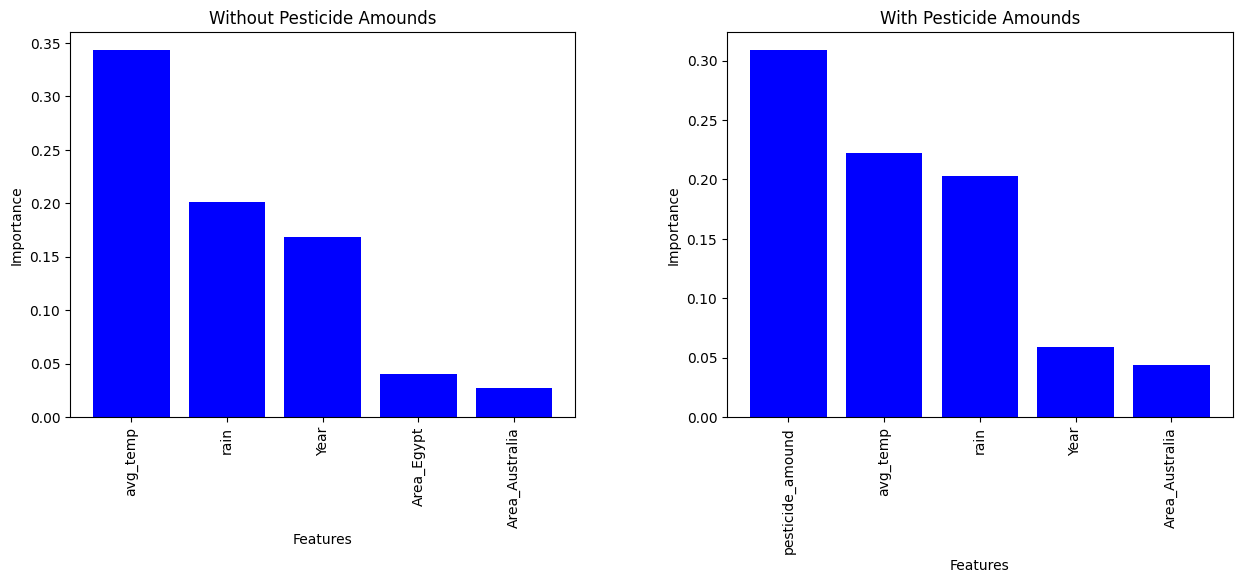

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#fist plot
# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = np.array(yield_df_onehot.drop("yield_amound", axis= 1).columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
ax[0].bar(range(5), importances[indices][:5], color="b", align="center")
ax[0].set_xticks(range(5), feature_names[indices][:5], rotation=90)
ax[0].set_xlabel("Features")
ax[0].set_ylabel("Importance")
ax[0].set_title("Without Pesticide Amounds")
# Get feature importances
importances = model1.feature_importances_

# Get feature names
feature_names = np.array(yield_df_onehot1.drop("yield_amound", axis= 1).columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
ax[1].bar(range(5), importances[indices][:5], color="b", align="center")
ax[1].set_xticks(range(5), feature_names[indices][:5], rotation=90)
ax[1].set_xlabel("Features")
ax[1].set_ylabel("Importance")
ax[1].set_title("With Pesticide Amounds")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plots
plt.show()

Judging from this visualisation of the feature importance, the pesticide amound seems really important for model building when the dataset has the information availeble.

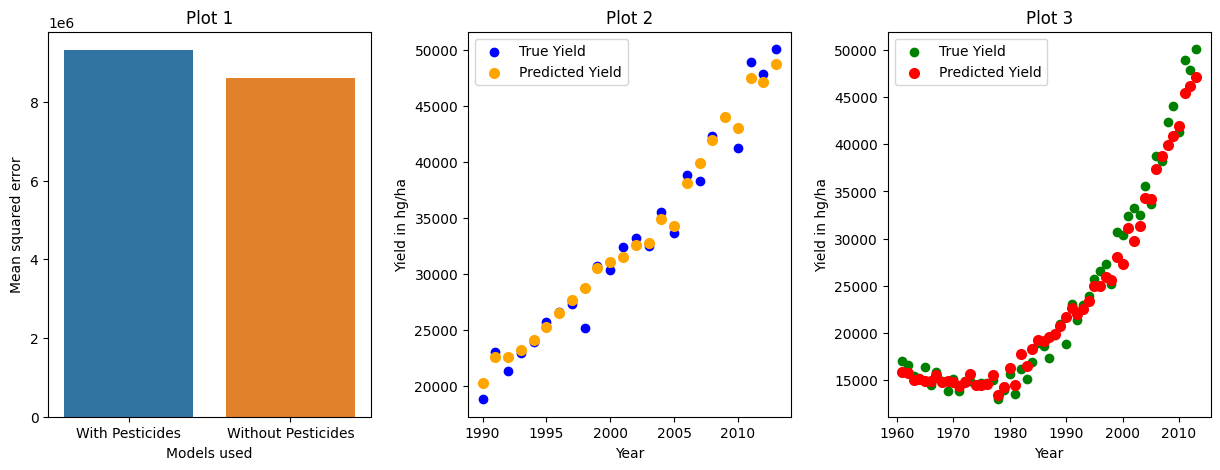

In [27]:
X_without["yield_org"] = y_without
X_without["yield_pred"] = y_pred_without
X_with["yield_org"] = y_with
X_with["yield_pred"] = y_pred_with
mse_with = mean_squared_error(X_with[X_with["Year"] >= 1990]["yield_org"] , X_with[X_with["Year"] >= 1990]["yield_pred"] )

mse_without_pesticides = mean_squared_error(X_without[X_without["Year"] >= 1990]["yield_org"] , X_without[X_without["Year"] >= 1990]["yield_pred"] )
di = pd.DataFrame({"model_type": ["With Pesticides", "Without Pesticides"], "MSE": [mse_with,mse_without_pesticides]})

# First plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.barplot(data=di, y="MSE", x="model_type", ax=ax[0])
ax[0].set_xlabel("Models used")
ax[0].set_ylabel("Mean squared error")
ax[0].set_title("Plot 1")

# Plot 2
ax[1].scatter(X_with[X_with["Area_Brazil"] == True]["Year"], X_with[X_with["Area_Brazil"] == True]["yield_org"], color='blue', label="True Yield")
ax[1].scatter(X_with[X_with["Area_Brazil"] == True]["Year"], X_with[X_with["Area_Brazil"] == True]["yield_pred"], color='orange', label="Predicted Yield", linewidth=2)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Yield in hg/ha")
ax[1].set_title("Plot 2")
ax[1].legend()

# Plot 3
ax[2].scatter(X_without[X_without["Area_Brazil"] == True]["Year"], X_without[X_without["Area_Brazil"] == True]["yield_org"], color='green', label="True Yield")
ax[2].scatter(X_without[X_without["Area_Brazil"] == True]["Year"], X_without[X_without["Area_Brazil"] == True]["yield_pred"], color='red', label="Predicted Yield", linewidth=2)
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Yield in hg/ha")
ax[2].set_title("Plot 3")
ax[2].legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plots
plt.show()

But in as seen above in Plot 1, it does seem to achieve a performance difference. The Model without information about the pesticide amounts get a lower mse. The mse is comparable here, because the same timeframe is used to calculate it. This means the timeframe is more important than the information about the pesticide amounts, and knowing that, the pesticide amounts will not  be used anymore.

In general we get quite good results for both models. Shown in Pots 2, with information about pesticides, and in Plot 3, without information about pesticides, the model give quite good predictions, here for brazil.

# The Prediction of the Future

# RNN


c:\Users\Lucas\miniconda3\envs\Pythonuse\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.500e+09, tolerance: 5.636e+07
  model = cd_fast.enet_coordinate_descent(


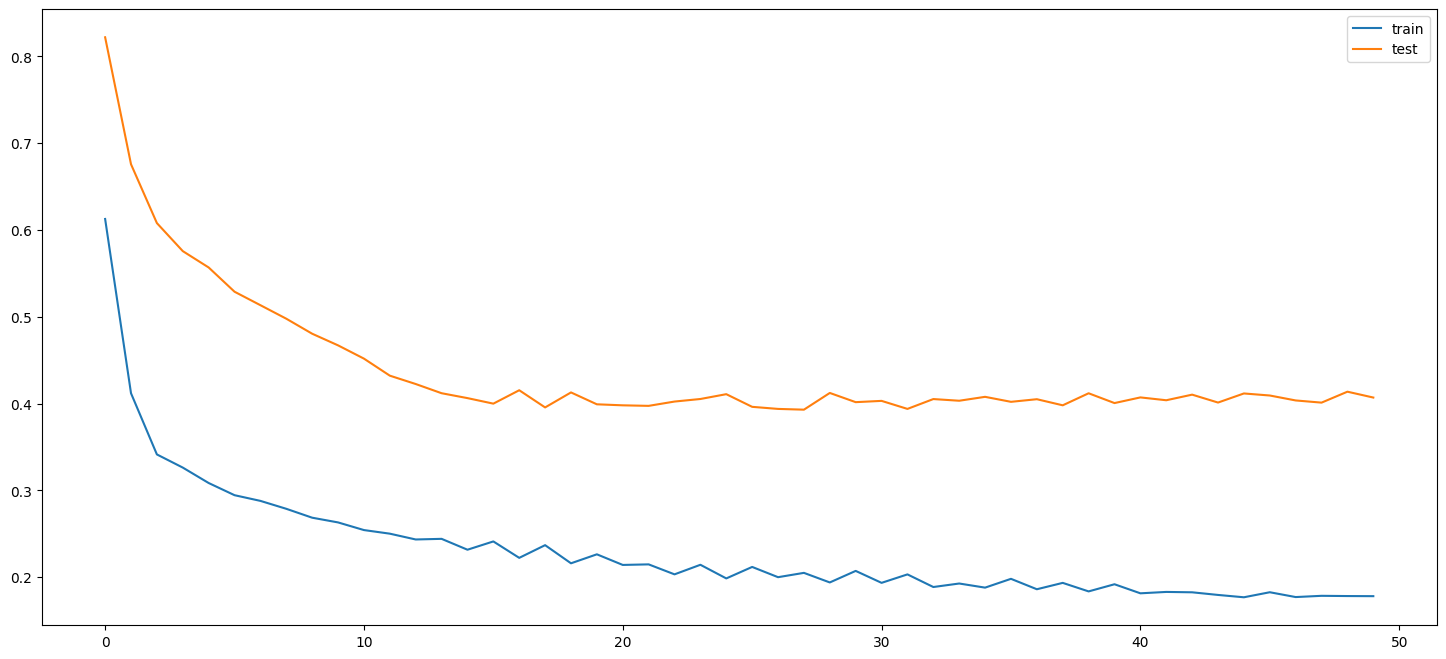

31/31 [==============================] - 0s 2ms/step


C:\Users\Lucas\AppData\Local\Temp\ipykernel_14608\1478121526.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all_short["RNN"] = inv_yhat


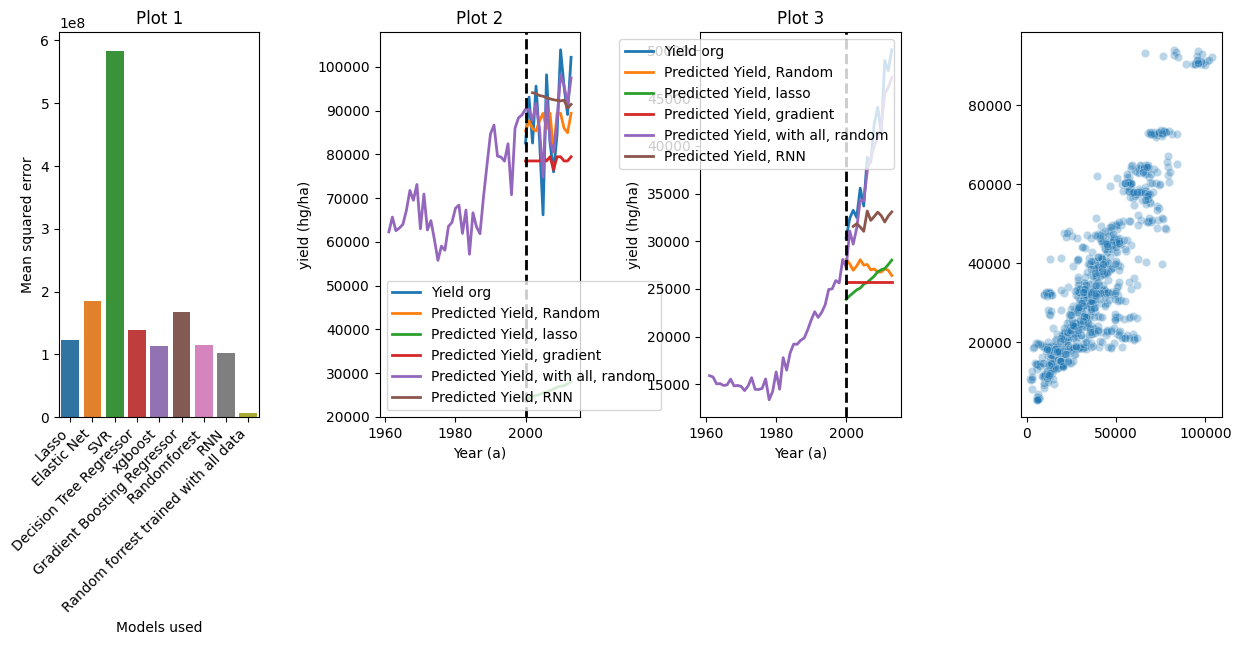

In [28]:
datas = data[data["Unit_x"] == "hg/ha"]
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item", axis= 1)
datas = datas.drop("pesticide_amound", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])
datas_early = datas[datas["Year"] <= year] #restricting the timeframe to data till 2005
datas_late =datas[datas["Year"] >= year] #using only the "future" for the mse
# training the model with short timeframe
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas_early, columns=object_columns, prefix = object_columns)
yield_df_onehot = yield_df_onehot.dropna()
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating y pred with long data
yield_df_onehot = pd.get_dummies(datas_late, columns=object_columns, prefix = object_columns)
yield_df_onehot = yield_df_onehot.dropna()
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']
y_all = y
X_all = X
X = scaler.transform(X)

#linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_all_linear = model.predict(X)
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
y_pred_all_ridge = model.predict(X)

from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
y_pred_all_lasso = model.predict(X)

from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
y_pred_all_elasticnet = model.predict(X)

from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_pred_all_svr = model.predict(X)

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_all_decision_tree = model.predict(X)

import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred_all_gradient_boosting = model.predict(X)

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_all_gradient = model.predict(X)
# Randomforest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_all_random_forrest = model.predict(X)

y_all = y
#adding pred y to dataframe
X_all["yield_org"] = y_all
X_all["y_pred_all_linear"] = y_pred_all_linear
X_all["y_pred_all_lasso"] = y_pred_all_lasso
X_all["y_pred_all_elasticnet"] = y_pred_all_elasticnet
X_all["y_pred_all_svr"] = y_pred_all_svr
X_all["y_pred_all_decision_tree"] = y_pred_all_decision_tree
X_all["y_pred_all_gradient_boosting"] = y_pred_all_gradient_boosting
X_all["y_pred_all_gradient"] = y_pred_all_gradient
X_all["y_pred_all_random_forrest"] = y_pred_all_random_forrest

mse_all_linear = mean_squared_error(X_all["yield_org"] , X_all["y_pred_all_linear"] )
mse_lasso = mean_squared_error(X_all["yield_org"] , X_all["y_pred_all_lasso"] )
mse_elastic = mean_squared_error(X_all["yield_org"] , X_all["y_pred_all_elasticnet"] )
mse_svr = mean_squared_error(X_all["yield_org"] , X_all["y_pred_all_svr"] )
mse_decision = mean_squared_error(X_all["yield_org"] , X_all["y_pred_all_decision_tree"] )
mse_gradienboost = mean_squared_error(X_all["yield_org"] , X_all["y_pred_all_gradient_boosting"] )
mse_all_gradient = mean_squared_error(X_all["yield_org"] , X_all["y_pred_all_gradient"] )
mse_all_random_forrest = mean_squared_error(X_all["yield_org"] , X_all["y_pred_all_random_forrest"] )

mse_without_pesticides = mean_squared_error(X_without["yield_org"] , X_without["yield_pred"] )
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

datas = data[data["Unit_x"] == "hg/ha"]
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item", axis= 1)
datas = datas.drop("pesticide_amound", axis=1)
datas = datas.dropna()
column_to_move = datas.pop("yield_amound")

# insert column with insert(location, column_name, column_value)

datas.insert(0, "yield_amound", column_to_move)
datas = datas.drop_duplicates(subset= ["Area", "Year"])
rows = datas[datas["Year"] <= year].shape[0]
from datetime import datetime
datas.Year = datas.Year.astype("int32")
datas.Year = pd.to_datetime(datas.Year, format= "%Y")
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)
datas = yield_df_onehot
datas = datas.set_index("Year")
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
values = datas.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features

scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 15
n_features = len(datas.columns)
features_1 = n_features-1
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
#print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train_hours = rows
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
#print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -features_1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -features_1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse_RNN = mean_squared_error(inv_y, inv_yhat)


inv_yhat.shape[0]
X_all_short = X_all[-inv_yhat.shape[0]:]
X_all_short["RNN"] = inv_yhat


di = pd.DataFrame({"model_type": [ "Lasso","Elastic Net", "SVR","Decision Tree Regressor", "xgboost", "Gradient Boosting Regressor", "Randomforest", "RNN", "Random forrest trained with all data"],
                    "MSE": [ mse_lasso, mse_elastic, mse_svr, mse_decision, mse_gradienboost, mse_all_gradient, mse_all_random_forrest, mse_RNN, mse_without_pesticides]})
# First plot
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Plot 1
sns.barplot(data=di, y="MSE", x="model_type", ax=ax[0])
ax[0].set_xlabel("Models used")
ax[0].set_ylabel("Mean squared error")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_title("Plot 1")

# Plot 2
sns.lineplot(x = X_all[X_all["Area_Australia"] == True]["Year"], y = X_all[X_all["Area_Australia"] == True]["yield_org"], label="Yield org", linewidth=2, ax=ax[1]) # first dataset
sns.lineplot(x = X_all[X_all["Area_Australia"] == True]["Year"], y = X_all[X_all["Area_Australia"] == True]["y_pred_all_random_forrest"],  label="Predicted Yield, Random", linewidth=2, ax=ax[1]) # first dataset
sns.lineplot(x = X_all[X_all["Area_Brazil"] == True]["Year"], y = X_all[X_all["Area_Brazil"] == True]["y_pred_all_lasso"],  label="Predicted Yield, lasso", linewidth=2, ax=ax[1]) # first dataset
sns.lineplot(x = X_all[X_all["Area_Australia"] == True]["Year"], y = X_all[X_all["Area_Australia"] == True]["y_pred_all_gradient"],  label="Predicted Yield, gradient", linewidth=2, ax=ax[1]) # first dataset
sns.lineplot(x = X_without[X_without["Area_Australia"] == True]["Year"], y = X_without[X_without["Area_Australia"] == True]["yield_pred"],  label="Predicted Yield, with all, random", linewidth=2, ax=ax[1]) # first dataset
sns.lineplot(x = X_all_short[X_all_short["Area_Australia"] == True]["Year"], y = X_all_short[X_all_short["Area_Australia"] == True]["RNN"], label="Predicted Yield, RNN", linewidth=2, ax = ax[1]) # first dataset
ax[1].axvline(x=year, color = "black", linestyle = "dashed", linewidth = 2, label="Prediction from here")
ax[1].set_xlabel("Year (a)")
ax[1].set_ylabel("yield (hg/ha)")
ax[1].set_title("Plot 2")
# Plot 3
sns.lineplot(x = X_all[X_all["Area_Brazil"] == True]["Year"], y = X_all[X_all["Area_Brazil"] == True]["yield_org"], label="Yield org", linewidth=2, ax=ax[2]) # first dataset
sns.lineplot(x = X_all[X_all["Area_Brazil"] == True]["Year"], y = X_all[X_all["Area_Brazil"] == True]["y_pred_all_random_forrest"],  label="Predicted Yield, Random", linewidth=2, ax=ax[2]) # first dataset
sns.lineplot(x = X_all[X_all["Area_Brazil"] == True]["Year"], y = X_all[X_all["Area_Brazil"] == True]["y_pred_all_lasso"],  label="Predicted Yield, lasso", linewidth=2, ax=ax[2]) # first dataset
sns.lineplot(x = X_all[X_all["Area_Brazil"] == True]["Year"], y = X_all[X_all["Area_Brazil"] == True]["y_pred_all_gradient"],  label="Predicted Yield, gradient", linewidth=2, ax=ax[2]) # first dataset
sns.lineplot(x = X_without[X_without["Area_Brazil"] == True]["Year"], y = X_without[X_without["Area_Brazil"] == True]["yield_pred"],  label="Predicted Yield, with all, random", linewidth=2, ax=ax[2]) # first dataset
sns.lineplot(x = X_all_short[X_all_short["Area_Brazil"] == True]["Year"], y = X_all_short[X_all_short["Area_Brazil"] == True]["RNN"], label="Predicted Yield, RNN", linewidth=2, ax = ax[2]) # first dataset
ax[2].axvline(x=year, color = "black", linestyle = "dashed", linewidth = 2, label="Prediction from here")
ax[2].set_xlabel("Year (a)")
ax[2].set_ylabel("yield (hg/ha)")
ax[2].set_title("Plot 3")
sns.scatterplot(x=inv_y, y=inv_yhat, alpha= 0.3, ax = ax[3])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Show the plots
plt.show()

When it comes to the Prediction, the mse increased. This is due to the missing data wich the model tries to predict.
Again the Randomforest gave the best predictions. But not nearly as good as the model which had all data available.
As shown in plot 2, which shows the model predictions for Australia, and Plot 3, which shows the model predictions for Brazil, the models have quite different accuracy's for the different countries. The predictions start from Year 2005, shown with the black dashed line in plot 2 and 3. The Randomforest seems to be the best suited to show variance, while the gradient boosting regressor is not so sensitive. Even tho the Lasso shows a low mse, the actual predictions on a country level are quite far of. The Lasso model only builds one function for all.

# Hyperparameter Optimization  

The RNN shows the best performance. To further improve the mse and model results the hyper parameters are optimized. To do this, the RNN model was transfered into a function, with the hyperprameters as arguments. Then multiple optimization strategies were deployed. The issue here is the very long training time of the RNN model. Due to the model structure the use of a GPU has no real improvement on perfomance and is also not optimized.  


### Minimization 

In [ ]:
from scipy.optimize import minimize
def model_training(params):
    n_hours, n_epochs, layer, batch_size = params
    n_hours = int(n_hours)
    n_epochs = int(n_epochs)
    layer = int(layer)
    batch_size = int(batch_size)
    reframed = series_to_supervised(scaled, n_hours, 1)
    values = reframed.values
    n_train_hours = rows
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -n_features]
    test_X, test_y = test[:, :n_obs], test[:, -n_features]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(layer, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=0, shuffle=False)

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, -features_1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, -features_1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    mse_RNN = mean_squared_error(inv_y, inv_yhat)
    mse_RNN = mse_RNN/10000000
    return mse_RNN

# Define the objective function to minimize
def objective(params):
    return model_training(params)

# Initial parameter values for optimization
initial_params = [10, 10, 10, 10]

# Minimize the objective function
result = minimize(objective, initial_params)

# Extract the optimized parameters
optimized_params = result.x

print("Optimized Parameters:", optimized_params)
print("Minimum Value of x:", result.fun)

The first approach is using a minimization function from scipy. In order to get the function to work, a object function and the initial parameters are defined.   
The Problem here is again the long training time, plus the algorithm didnt work. The steps the function took, were to small, and no optimal solution was found. 

### Manual Optimisation

The secound approach is build from scratch. Here first the direction of optimisation for the parameters in combination is calculated. This is done by using a range for each hyperprameter and training the model with each combination and then plotting the mean mse for the range of each hyperprameter. Thus giving the direction for the optimization. 

In [ ]:
def model_training(params): # function that build the model and training data with the used hyperprarmeters stored in params. 
    n_hours, n_epochs, layer, batch_size = params
    n_hours = int(n_hours)
    n_epochs = int(n_epochs)
    layer = int(layer)
    batch_size = int(batch_size)
    reframed = series_to_supervised(scaled, n_hours, 1)
    values = reframed.values
    n_train_hours = rows
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -n_features]
    test_X, test_y = test[:, :n_obs], test[:, -n_features]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(layer, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=0, shuffle=False)

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, -features_1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, -features_1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    mse_RNN = mean_squared_error(inv_y, inv_yhat)

    return mse_RNN

In [33]:
import itertools
import numpy as np

# Define the ranges of parameter values to analyze
n_hours_range = [2, 4, 6]
n_epochs_range = [10, 20, 30]
layer_range = [32, 64, 128]
batch_size_range = [16, 32, 64]

# Create a grid of parameter combinations
parameter_grid = list(itertools.product(n_hours_range, n_epochs_range, layer_range, batch_size_range))

# Initialize an array to store the MSE values
mse_values = np.zeros(len(parameter_grid))

# Perform sensitivity analysis
for i, params in enumerate(parameter_grid):
    mse = model_training(params)  # Call your model_training function with the current parameter combination
    mse_values[i] = mse

# Print the parameter combinations and corresponding MSE values
for i, params in enumerate(parameter_grid):
    print("Parameters:", params)
    print("MSE:", mse_values[i])
    print()

31/31 [==============================] - 0s 4ms/step
Parameters: (2, 10, 32, 16)
MSE: 146274688.0

Parameters: (2, 10, 32, 32)
MSE: 164541264.0

Parameters: (2, 10, 32, 64)
MSE: 199723040.0

Parameters: (2, 10, 64, 16)
MSE: 132353736.0

Parameters: (2, 10, 64, 32)
MSE: 158241936.0

Parameters: (2, 10, 64, 64)
MSE: 194748224.0

Parameters: (2, 10, 128, 16)
MSE: 126045248.0

Parameters: (2, 10, 128, 32)
MSE: 154255056.0

Parameters: (2, 10, 128, 64)
MSE: 182854624.0

Parameters: (2, 20, 32, 16)
MSE: 121412808.0

Parameters: (2, 20, 32, 32)
MSE: 144344608.0

Parameters: (2, 20, 32, 64)
MSE: 170442800.0

Parameters: (2, 20, 64, 16)
MSE: 117797928.0

Parameters: (2, 20, 64, 32)
MSE: 134098248.0

Parameters: (2, 20, 64, 64)
MSE: 153272352.0

Parameters: (2, 20, 128, 16)
MSE: 113962368.0

Parameters: (2, 20, 128, 32)
MSE: 132573640.0

Parameters: (2, 20, 128, 64)
MSE: 153496768.0

Parameters: (2, 30, 32, 16)
MSE: 114236064.0

Parameters: (2, 30, 32, 32)
MSE: 124648552.0

Parameters: (2, 30, 3

In the code above, first ranges for each hyperprameter is defined and then a grid with every possible combination of the ranges of the hyperprameters is build. Then the model is build and trained on each combination and the mse is calculated and stored. 

In [48]:
df = pd.DataFrame({'List Column': parameter_grid, 'mse_values': mse_values})
df[['n_hours', 'n_epochs', 'layer', 'batchsize']] = df['List Column'].apply(pd.Series)
df = df.drop('List Column', axis=1)

Then the mse values are put togesthere 

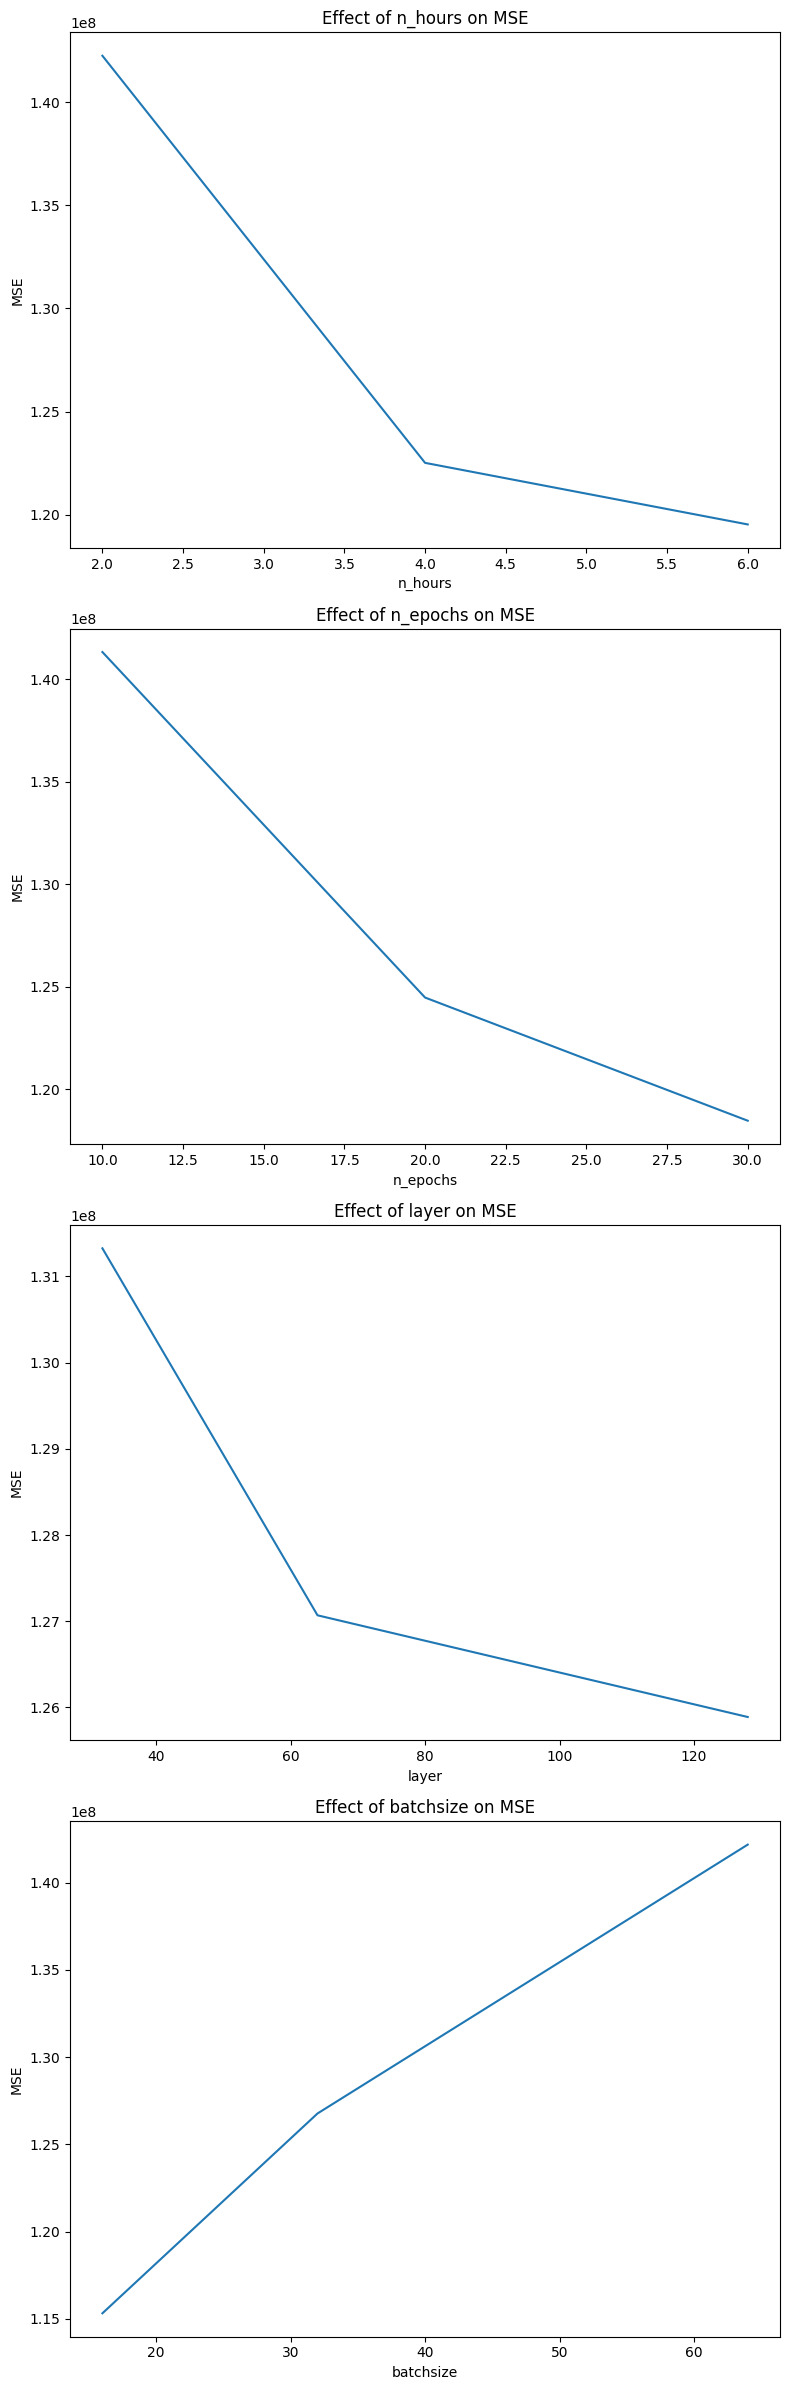

In [52]:
# Parameters to visualize
parameters = ['n_hours', 'n_epochs', 'layer', 'batchsize']

# Create subplots
fig, axs = plt.subplots(len(parameters), 1, figsize=(8, 6 * len(parameters)))

# Plot for each parameter
for i, parameter in enumerate(parameters):
    # Get unique values of the parameter
    unique_values = df[parameter].unique()

    # Calculate the average MSE for each unique value of the parameter
    avg_mse_values = []
    for value in unique_values:
        mse_sum = df.loc[df[parameter] == value, 'mse_values'].sum()
        count = df.loc[df[parameter] == value].shape[0]
        avg_mse_values.append(mse_sum / count)

    # Create the plot
    axs[i].plot(unique_values, avg_mse_values)
    axs[i].set_xlabel(parameter)
    axs[i].set_ylabel('MSE')
    axs[i].set_title(f'Effect of {parameter} on MSE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

new plan optimierungs schleife bauen für einen parameter 
schleife:
model(x) 
wenn mse alt größer mse neu 
    uptade x * 1.2
wenn mse neu größer mse alt 
    print: best x = x 

optimal: merken welche x, welche mse 


In [55]:
def model_training(x):
    n_hours = 7.2
    n_epochs = x
    layer = 120
    batch_size = 15
    n_hours = int(n_hours)
    n_epochs = int(n_epochs)
    layer = int(layer)
    batch_size = int(batch_size)
    reframed = series_to_supervised(scaled, n_hours, 1)
    values = reframed.values
    n_train_hours = rows
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -n_features]
    test_X, test_y = test[:, :n_obs], test[:, -n_features]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(layer, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=0, shuffle=False)

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, -features_1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, -features_1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    mse_RNN = mean_squared_error(inv_y, inv_yhat)

    return mse_RNN

In [56]:
x = 30


31/31 [==============================] - 1s 5ms/step


125337150.0

In [57]:
best_x = None
best_mse = None

while True:
    # Assuming `model(x)` is a function that returns the MSE (mean squared error)
    mse_alt = model_training(x)
    mse_neu = model_training(x * 1.2)

    if mse_alt > mse_neu:
        x = x * 1.2
    elif mse_neu > mse_alt:
        best_x = x
        best_mse = mse_neu
        print("Best x =", best_x)
        break

# To store the optimal x and corresponding mse values
optimal = {
    'x': best_x,
    'mse': best_mse
}

31/31 [==============================] - 1s 6ms/step
Best x = 7.199999999999999
31/31 [==============================] - 1s 5ms/step
Best x = 7.199999999999999


KeyboardInterrupt: 